In [1]:
import torch
from torchvision import models, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torch.optim as optim
import os
import zipfile
import matplotlib.pyplot as plt
import torch.nn  as nn

In [2]:

# Load pre-trained ResNet-18
model = models.resnet18(pretrained=True)

# Modify the final layer for 7 classes
num_classes = 7
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)

# Switch to training mode
model.train()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 195MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the final layer
for param in model.fc.parameters():
    param.requires_grad = True


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile
import os

# Path to the uploaded zip file in Google Drive
zip_path = '/content/drive/MyDrive/archive (2).zip'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

# Check the extracted files
os.listdir('/content/dataset')

['train', 'test']

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
learning_rate = 0.01  # Adjusted learning rate for SGD
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

In [6]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = ImageFolder('/content/dataset/train', transform=train_transforms)
test_dataset = ImageFolder('/content/dataset/test', transform=test_transforms)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


<ipython-input-7-0df4c4085de4>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(saved_weights_path))


Loaded saved model weights from /content/drive/MyDrive/resnet18_final_weights.pth
Epoch 1, Loss: 1.2620, Training Accuracy: 53.70%
Epoch 1, Test Accuracy: 61.90%
Epoch 2, Loss: 0.9387, Training Accuracy: 65.24%
Epoch 2, Test Accuracy: 62.51%
Epoch 3, Loss: 0.7625, Training Accuracy: 72.07%
Epoch 3, Test Accuracy: 64.13%
Epoch 4, Loss: 0.5896, Training Accuracy: 78.63%
Epoch 4, Test Accuracy: 64.04%
Epoch 5, Loss: 0.4644, Training Accuracy: 83.18%
Epoch 5, Test Accuracy: 64.00%
Epoch 6, Loss: 0.3448, Training Accuracy: 87.76%
Epoch 6, Test Accuracy: 64.64%
Epoch 7, Loss: 0.2521, Training Accuracy: 91.00%
Epoch 7, Test Accuracy: 61.84%
Epoch 8, Loss: 0.1872, Training Accuracy: 93.50%
Epoch 8, Test Accuracy: 65.56%
Epoch 9, Loss: 0.1538, Training Accuracy: 94.60%
Epoch 9, Test Accuracy: 64.42%
Epoch 10, Loss: 0.1262, Training Accuracy: 95.81%
Epoch 10, Test Accuracy: 65.76%
Epoch 11, Loss: 0.0934, Training Accuracy: 96.86%
Epoch 11, Test Accuracy: 65.31%
Epoch 12, Loss: 0.0735, Training A

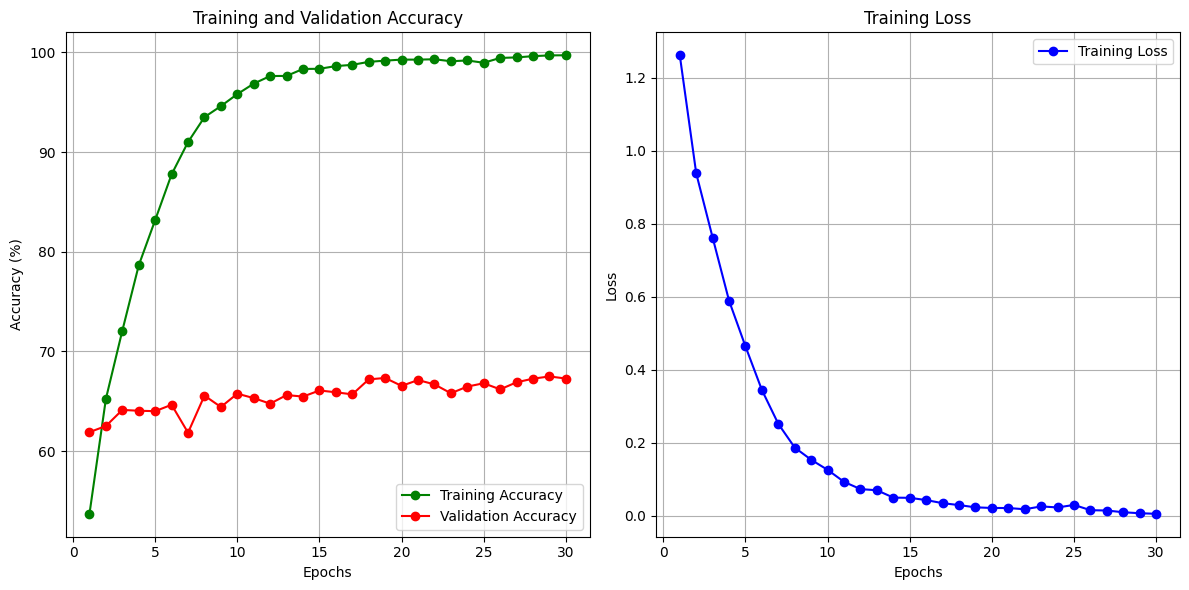

In [7]:

# Load saved weights if they exist
saved_weights_path = '/content/drive/MyDrive/resnet18_final_weights.pth'
try:
    model.load_state_dict(torch.load(saved_weights_path))
    print(f"Loaded saved model weights from {saved_weights_path}")
except FileNotFoundError:
    print("No saved weights found, starting training from scratch.")

    # Lists to store metrics for plotting
train_losses = []
train_accuracies = []
test_accuracies = []

# Training and evaluation loop
for epoch in range(30):
    # Training
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct_predictions / total_predictions
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    print(f"Epoch {epoch + 1}, Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_accuracy:.2f}%")

    # Evaluation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = 100 * correct / total
    test_accuracies.append(test_accuracy)
    print(f"Epoch {epoch + 1}, Test Accuracy: {test_accuracy:.2f}%")

# Save model weights after training
save_path = '/content/drive/MyDrive/resnet18_parameter_tuning.pth'
torch.save(model.state_dict(), save_path)
print(f"Model weights saved to {save_path}")


# Plot training loss and accuracies
def plot_metrics(train_losses, train_accuracies, test_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 6))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_accuracies, label='Training Accuracy', color='green', marker='o')
    plt.plot(epochs, test_accuracies, label='Validation Accuracy', color='red', marker='o')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid()

    # Plot training loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_losses, label='Training Loss', color='blue', marker='o')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Plot metrics
plot_metrics(train_losses, train_accuracies, test_accuracies)